# M2608.001300 Machine Learning <br> Assignment #3-1 support vector machine, linear kernel

Copyright (C) Data Science and Artificial Intelligence Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. Written by Jeonghee Jo, April 2018

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
<font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.  
Once you have done **all parts**, run the *CollectSubmission.sh* script with your **student_id** as input argument. <br>
This will produce a zipped file called *[student_id].zip*. Please submit this file on ETL. &nbsp;&nbsp; (Usage: ./*CollectSubmission.sh* &nbsp; student_id)

## Load dataset

In [1]:
import pickle
import random
import time

from __future__ import print_function
import numpy as np
from numpy import exp, linalg
import matplotlib
import matplotlib.pyplot as plt

from IPython.core.debugger import set_trace

%matplotlib inline

In [2]:
f = open("train_images.pickle", 'rb')
train_images = pickle.load(f)
f.close()

f2 = open("train_labels.pickle", 'rb')
train_labels = pickle.load(f2)
f2.close()

g = open("test_images.pickle", 'rb')
test_images = pickle.load(g)
g.close()

g2 = open("test_labels.pickle", 'rb')
test_labels = pickle.load(g2)
g2.close()

In [3]:
print("train images shape: ", train_images.shape)
print("train labels shape: ", train_labels.shape)
print("test images shape: ", test_images.shape)
print("test labels shape: ", test_labels.shape)

train images shape:  (10000, 28, 28)
train labels shape:  (10000,)
test images shape:  (5000, 28, 28)
test labels shape:  (5000,)


In [4]:
num_training = train_images.shape[0]
image_size = train_images.shape[1]

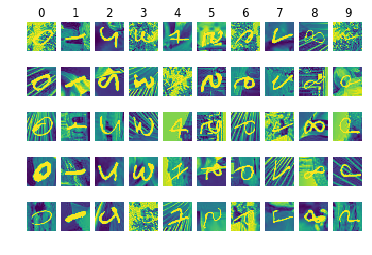

In [5]:
classes = list(range(10))

num_classes = 10
sample_per_class = 5


for y, cls in enumerate(classes):
    idxs = np.flatnonzero(train_labels == y)
    idxs = np.random.choice(idxs, sample_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(sample_per_class, num_classes, plt_idx)
        plt.imshow(train_images[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()

## Preprocessing

In [6]:
train_images = np.reshape(train_images, (np.array(train_images).shape[0], -1))
test_images = np.reshape(test_images, (np.array(test_images).shape[0], -1))

print("Training data shape: ", train_images.shape)
print("Test data shape: ", test_images.shape)

Training data shape:  (10000, 784)
Test data shape:  (5000, 784)


In [7]:
np.random.seed(0)

[0.5064159  0.5031575  0.50306964 0.50225043 0.5030053  0.5021769
 0.50124836 0.50039864 0.4983649  0.4961751 ]


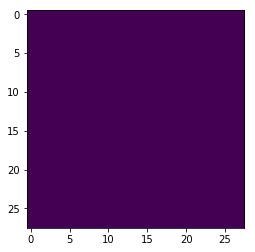

In [8]:
mean_image = np.mean(train_images, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((28,28)).astype('uint8'))
plt.show()

In [9]:
train_images -= mean_image
test_images -= mean_image

In [10]:
train_images = train_images.reshape((-1, image_size * image_size)).astype(np.float32)
test_images = test_images.reshape((-1, image_size * image_size)).astype(np.float32)

print("train_images", train_images.shape)
print("train_labels", train_labels.shape)
print("test_images", test_images.shape)
print("test_labels", test_labels.shape)

train_images (10000, 784)
train_labels (10000,)
test_images (5000, 784)
test_labels (5000,)


In [11]:
train_images = np.reshape(train_images, (train_images.shape[0], -1))
test_images = np.reshape(test_images, (test_images.shape[0], -1))

print('Training data shape: ', train_images.shape)
print('Test data shape: ', test_images.shape)

Training data shape:  (10000, 784)
Test data shape:  (5000, 784)


In [12]:
train_images = np.hstack([train_images, np.ones((train_images.shape[0], 1))])
test_images = np.hstack([test_images, np.ones((test_images.shape[0], 1))])
train_labels_onehot = np.zeros((len(train_labels), 10))
train_labels_onehot[range(len(train_labels)), train_labels] += 1

print("train_images", train_images.shape)
print("train_labels", train_labels.shape)
print("test_images", test_images.shape)
print("test_labels", test_labels.shape)

train_images (10000, 785)
train_labels (10000,)
test_images (5000, 785)
test_labels (5000,)


## **1. function <i>svm_loss_one</i>**

    Structured SVM loss function, naive implemntation (with loops).
    Inputs have dimension D, there are C classes, and we operate on minibatches of N samples.
    
`Inputs:`
- W: A numpy array of shape (D, C) containing weights.
- X: A numpy array of shape (N, D) containing a minibatch of data.
- y: A numpy array of shape (N,) containing labels; y[i] = c means that X[i] has label c, where 0 <= c < C.
- reg: (float) regularization strength
    
`Returns a tuple of`
- loss as single float
- gradient with respect to weights W; an array of same shape as W
    

In [13]:
def svm_loss_one(W, X, y, reg):
    
    dW = np.zeros(W.shape)
    num_classes = W.shape[1]
    num_train = X.shape[0]
    delta = 1.0
    
    loss = 0.0
    
    for i in range(num_train):
        scores = np.matmul(X[i, :], W) # scores.shape (C,)
        correct_class_score = scores[y[i]]
        num_incorrect = 0
        
        for j in range(num_classes):
            if j == y[i]:
                continue
            margin = scores[j] - correct_class_score + 1 # delta = 1
            if margin > 0:
                # TO DO
                num_incorrect += 1
                loss += margin
                dW[:, j] += X[i, :]
                
        dW[:, y[i]] -= num_incorrect*X[i, :]
                
    loss /= num_train
    loss += 0.5 * reg * np.sum(W * W)

    dW /= num_train
    dW += reg * W

    return loss, dW
    

In [14]:
W = np.random.randn(785, 10) * 0.0001

loss, _ = svm_loss_one(W, train_images[:1000], train_labels[:1000], 1e-2)

print("loss: %f" %(loss))

loss: 9.000045


## **2. function <i>svm_loss_all</i>**

Inputs and outputs are the same as <i>svm_loss_one</i>

In [15]:
def svm_loss_all(W, X, y, reg):
    
    dW = np.zeros(W.shape)
    
    num_train = X.shape[0]
    delta = 1.0
    
    loss = 0.0
    
    scores = np.matmul(X, W) ## scores (N, C)
    correct_class_score = scores[np.arange(num_train), y] ## correct_class_score (N,)

    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + delta) ## margins (N, C)
    margins[np.arange(num_train), y] = 0
    
    loss = np.sum(margins)/num_train + 0.5*reg*np.sum(W * W)
    
    L = np.zeros(margins.shape) ## L (N, C)
    L[margins > 0] = 1
    incorrect_counts = np.sum(L, axis=1) ## incorrect_counts (N,)
    L[np.arange(num_train), y] = -incorrect_counts
    
    dW = np.matmul(np.transpose(X), L)/num_train + reg*W
    
    return loss, dW

In [16]:
W = np.random.randn(785, 10) * 0.0001

loss, _ = svm_loss_all(W, train_images[:1000], train_labels[:1000], 1e-2)

print("loss: %f" %(loss))

loss: 8.998714


In [17]:
class LinearSVM(object):
    
    def __init__(self):
        self.W = None
        self.loss_history = []
        self.num_train = None
        self.dim = None
        self.num_classes = None
        
        
    def loss(self, X_batch, y_batch, reg):
        loss, grad = svm_loss_all(self.W, X_batch, y_batch, reg)
        self.loss_history.append(loss)
        return loss, grad
    
    def update_weights(self, grad, learning_rate):
        self.W -= learning_rate*grad
        
    def train(self, X, y, learning_rate, reg, num_iters, batch_size, verbose=True):
        self.num_train = X.shape[0]
        self.dim = X.shape[1]
        self.num_classes = np.max(y) + 1
        
        if self.W is None:
            self.W = 0.001 * np.random.randn(self.dim, self.num_classes)
            
        for iteration in range(1, num_iters+1):
            X_batch, y_batch = None, None
            
            random_indices = np.random.choice(self.num_train, batch_size, replace=False)
            X_batch, y_batch = X[random_indices], y[random_indices]
            
            _, grad = self.loss(X_batch, y_batch, reg)
            
            self.update_weights(grad, learning_rate)
            
            if iteration%1000 == 0:
                print("loss %f at iteration %d " %(np.sum(self.loss_history[-100:])/batch_size, int(iteration)))
                train_labels_pred = self.predict(train_images)
                train_acc = np.mean(train_labels_pred == train_labels)
                print("  train accuracy: %.2f" %(train_acc*100))
                test_labels_pred = self.predict(test_images)
                test_acc = np.mean(test_labels_pred == test_labels)
                print("  validation(test) accuracy: %.2f" %(test_acc*100))
        
    def predict(self, X):
        
        y_pred = np.argmax(np.matmul(X, self.W), axis = 1)
        
        return y_pred

In [18]:
svm = LinearSVM()
svm.train(train_images, train_labels, learning_rate=3e-4, reg=0, num_iters=50000, batch_size=2000)

loss 0.217829 at iteration 1000 
  train accuracy: 62.69
  validation(test) accuracy: 61.84
loss 0.161067 at iteration 2000 
  train accuracy: 68.13
  validation(test) accuracy: 65.86
loss 0.139114 at iteration 3000 
  train accuracy: 69.95
  validation(test) accuracy: 67.32
loss 0.126139 at iteration 4000 
  train accuracy: 70.83
  validation(test) accuracy: 68.14
loss 0.119038 at iteration 5000 
  train accuracy: 71.40
  validation(test) accuracy: 68.78
loss 0.113225 at iteration 6000 
  train accuracy: 71.81
  validation(test) accuracy: 69.26
loss 0.108291 at iteration 7000 
  train accuracy: 72.40
  validation(test) accuracy: 69.62
loss 0.104307 at iteration 8000 
  train accuracy: 72.68
  validation(test) accuracy: 70.00
loss 0.101774 at iteration 9000 
  train accuracy: 72.94
  validation(test) accuracy: 70.22
loss 0.099114 at iteration 10000 
  train accuracy: 73.13
  validation(test) accuracy: 70.54
loss 0.096568 at iteration 11000 
  train accuracy: 73.44
  validation(test) ac

In [19]:
test_labels_pred = svm.predict(test_images)

In [20]:
test_acc = np.mean(test_labels_pred == test_labels)

In [21]:
print("test accuracy: %.2f" %(test_acc*100))

test accuracy: 71.42
